<a href="https://colab.research.google.com/github/itzelgabrielaroquedelgado076-cell/UNIDAD_4/blob/main/Student_Performance_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd

url="https://raw.githubusercontent.com/itzelgabrielaroquedelgado076-cell/UNIDAD_4/refs/heads/main/Student_Performance_new...csv"

df=pd.read_csv(url)
df= df.dropna()

df

,etnia,nivel_educativo_de_los_padres,tipo_de_comida,curso_de_preparación_para_el_examen,porcentaje_de_matematicas,porcentaje_de_lectura,porcentaje_de_escritura,sexo
0,group_B,licenciatura,estandar,nada,0.72,0.72,0.74,mujer
1,group_C,algo_de_universidad,estandar,completado,0.69,0.90,0.88,mujer
2,group_B,maestria,estandar,nada,0.90,0.95,0.93,mujer
3,group_A,tecnico_asociado,subsidiado,nada,0.47,0.57,0.44,hombre
4,group_C,algo_de_universidad,estandar,nada,0.76,0.78,0.75,hombre
...,...,...,...,...,...,...,...,...
995,group_E,maestria,estandar,completado,0.88,0.99,0.95,mujer
996,group_C,preparatoria,subsidiado,nada,0.62,0.55,0.55,hombre
997,group_C,preparatoria,subsidiado,completado,0.59,0.71,0.65,mujer
998,group_D,algo_de_universidad,estandar,completado,0.68,0.78,0.77,mujer


In [129]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#Y~X
modelo_lineal = ols(
    'porcentaje_de_matematicas ~ C(etnia)+ C(nivel_educativo_de_los_padres) + C(tipo_de_comida) + C(curso_de_preparación_para_el_examen) + porcentaje_de_lectura + porcentaje_de_escritura + C(sexo)',
    data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Itzel Gabriela Roque Delgado

,df,sum_sq,mean_sq,F,PR(>F)
C(etnia),4.0,1.272882,0.318220,110.683797,6.167460e-78
C(nivel_educativo_de_los_padres),5.0,0.575969,0.115194,40.066866,1.464499e-37
C(tipo_de_comida),1.0,2.692468,2.692468,936.497196,4.319972e-145
C(curso_de_preparación_para_el_examen),1.0,0.695841,0.695841,242.028207,5.785125e-49
C(sexo),1.0,0.614786,0.614786,213.835657,5.697216e-44
porcentaje_de_lectura,1.0,13.537955,13.537955,4708.787173,0.000000e+00
porcentaje_de_escritura,1.0,0.747093,0.747093,259.854611,4.624563e-52
Residual,985.0,2.831915,0.002875,NaN,NaN


**CONCLUSIÓN:**

El valor-p obtenido en el ANOVA para cada una de las variables es menor al nivel de significancia de 0.05, por lo que se rechaza la hipótesis nula y esto nos indica que se acepta la hipótesis alternativa y significa que si hay diferencia significativa y que todas las variables son importantes en la variable dependiente que es el porcentaje de matematicas ya que todas las variables categóricas evaluadas tienen un efecto significativo sobre el porcentaje de matemáticas.

In [130]:
df["etnia"].unique()

array(['group_B', 'group_C', 'group_A', 'group_D', 'group_E'],
      dtype=object)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_A group_B   0.0182 0.8724 -0.0336 0.0701  False
group_A group_C   0.0283 0.4968   -0.02 0.0767  False
group_A group_D   0.0573 0.0138  0.0078 0.1068   True
group_A group_E   0.1219    0.0  0.0672 0.1766   True
group_B group_C   0.0101 0.9452 -0.0269 0.0471  False
group_B group_D   0.0391  0.044  0.0006 0.0776   True
group_B group_E   0.1037    0.0  0.0587 0.1486   True
group_C group_D    0.029  0.129 -0.0047 0.0626  False
group_C group_E   0.0936    0.0  0.0527 0.1345   True
group_D group_E   0.0646 0.0003  0.0223 0.1068   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

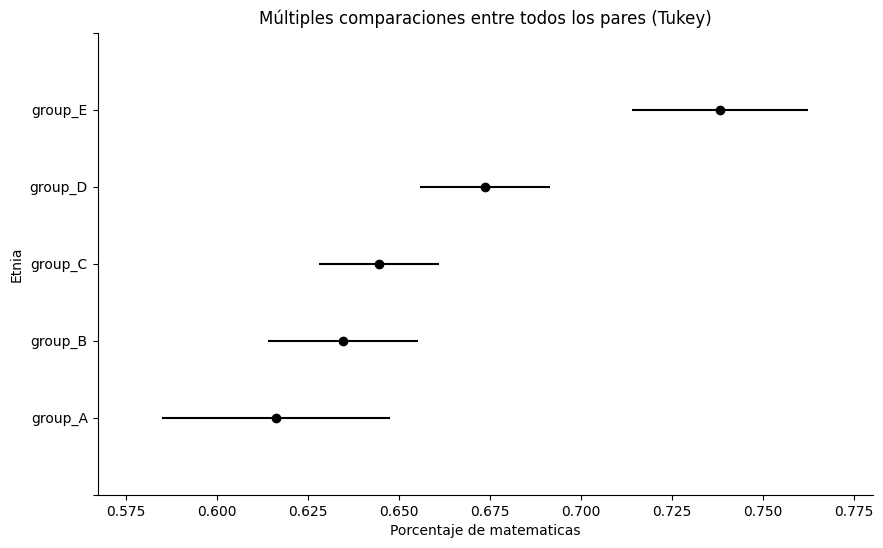

In [131]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'], #variable de respuesta
    groups=df['etnia'], #variable categorica
    alpha=nivel_de_significancia) #nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Etnia", xlabel="Porcentaje de matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Muestra los intervalos o niveles de confianza en las lineas, lo cual según el gráfico el grupo dentro de
#la variable etnia que tiene un porcentaje de matematicas mayor es el grupo E.
#Itzel Gabriela Roque Delgado

In [132]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(etnia)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#Itzel Gabriela Roque Delgado

η² (tamaño de efecto): 0.055


**CONCLUSIÓN:**

El 5.5% de la varibilidad en el porcentaje de matematicas se puede explicar por la variabilidad en la etnia y el modelo; lo cual este porcentaje nos indica que este tamaño de efecto se considera pequeño a mediano, lo cual sugiere que, aunque la etnia influye significativamente en el rendimiento matemático, su impacto no es muy grande en comparación con otros posibles factores que se representan por el 99.945% restante.

**CONCLUSIÓN:**

La prueba de Tuckey nos muestra los intervalos o niveles de confianza en las lineas para comparar cada par de grupo. En el gráfico se observa que dentro de la variable etnia el grupo que tiene un porcentaje mayor en matematicas es el grupo E. También es posible identificar que algunos grupos no tienen diferencia significativa entre sí los cuales son el grupo A y B, A y C, B y C y por último en el grupo C y D lo que significa que el porcentaje en matemáticas que estos tienen son muy similares pero por otro lado Tuckey nos muestra que hay diferencias significativas entre varios grupos entre los cuales están el grupo A y D, A y E, B y D, B y E, C y E, y en el grupo D y E lo cual esto nos revela que los grupos que E y D se distinguen de varios de los demás. La prueba de Tukey conforme a lo anterior nos mostró que no todas las etnias tienen el mismo porcentaje en matemáticas. Algunos grupos sacan más y otros menos, y esas diferencias son reales, no por azar. Por eso podemos decir que la etnia sí está relacionada con los resultados o porcentajes de matemáticas.

In [133]:
df["nivel_educativo_de_los_padres"].unique()

array(['licenciatura', 'algo_de_universidad', 'maestria',
       'tecnico_asociado', 'preparatoria', 'algo_de_preparatoria'],
      dtype=object)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
algo_de_preparatoria algo_de_universidad   0.0363 0.1482 -0.0064   0.079  False
algo_de_preparatoria        licenciatura   0.0589 0.0119  0.0083  0.1096   True
algo_de_preparatoria            maestria   0.0625 0.0611 -0.0016  0.1266  False
algo_de_preparatoria        preparatoria  -0.0136 0.9515 -0.0577  0.0306  False
algo_de_preparatoria    tecnico_asociado   0.0439 0.0418   0.001  0.0868   True
 algo_de_universidad        licenciatura   0.0226 0.7676 -0.0259  0.0711  False
 algo_de_universidad            maestria   0.0262 0.8384 -0.0363  0.0886  False
 algo_de_universidad        preparatoria  -0.0499 0.0086 -0.0916 -0.0082   True
 algo_de_universidad    tecnico_asociado   0.0075 0.9948 -0.0328  0.0479  False
        licenciatura            maestria

Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

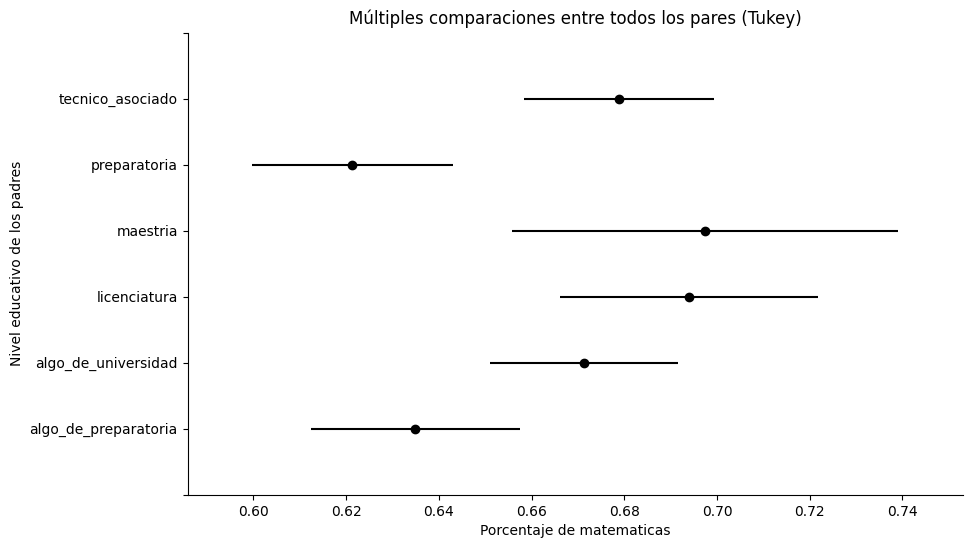

In [134]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'], #variable de respuesta
    groups=df['nivel_educativo_de_los_padres'], #variable categorica
    alpha=nivel_de_significancia) #nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Nivel educativo de los padres", xlabel="Porcentaje de matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Muestra los intervalos o niveles de confianza en las lineas, lo cual según el gráfico el nivel educativo que tiene
#un porcentaje mayor en matematicas es el de maestría.
#Itzel Gabriela Roque Delgado

In [135]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(nivel_educativo_de_los_padres)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#Itzel Gabriela Roque Delgado

η² (tamaño de efecto): 0.025


**CONCLUSIÓN:**

El 2.5% de la variabilidad del porcentaje de matematicas se puede explicar por la variabilidad en el nivel educativo de los padres, lo que nos indica que este tiene un efecto pequeño lo que implica que aunque el nivel educativo de los padres influye en el porcentaje de matematicas su impacto es limitado y la mayor parte de la variabilidad de los resultados se debe a otros factores que forman parte del 97.5% restante.

**CONCLUSIÓN:**

La prueba de Tukey muestra que la mayoría de los niveles educativos de los padres no presentan diferencias significativas en el porcentaje de matemáticas de los estudiantes. Esto significa que, en general, los puntajes de matemáticas son muy parecidos entre la mayoría de los grupos. Sin embargo, sí se detectan algunas diferencias importantes como lo es el grupo de maestría en el que este tiene un porcentaje de matemáticas significativamente mayor que el grupo de licenciatura en el que además el grupo de preparatoria también se diferencia de técnico asociado mostrando este un mejor porcentaje de matematicas siendo el mismo caso para el grupo de algo de preparatoria que se diferencia con el grupo de licenciatura y técnico asociado y por último el grupo donde se presentan diferencias significativas son en el de algo de universidad y y preparatoria en donde no se muestra ninguna otra combinación que presenta diferencias significativas por lo que en conjunto, estos resultados indican que el nivel educativo de los padres no influye de manera consistente en el porcentaje de matemáticas, ya que solo algunos pares de grupos muestran diferencias significativas y la mayoría presentan porcentajes de matematicas muy similares en donde como fue mencionado anteriormente el nivel que parece influir un poco más en el porcentaje de matematicas es el de la maestría.

In [136]:
df["tipo_de_comida"].unique()

array(['estandar', 'subsidiado'], dtype=object)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
estandar subsidiado  -0.1111   0.0 -0.1296 -0.0927   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

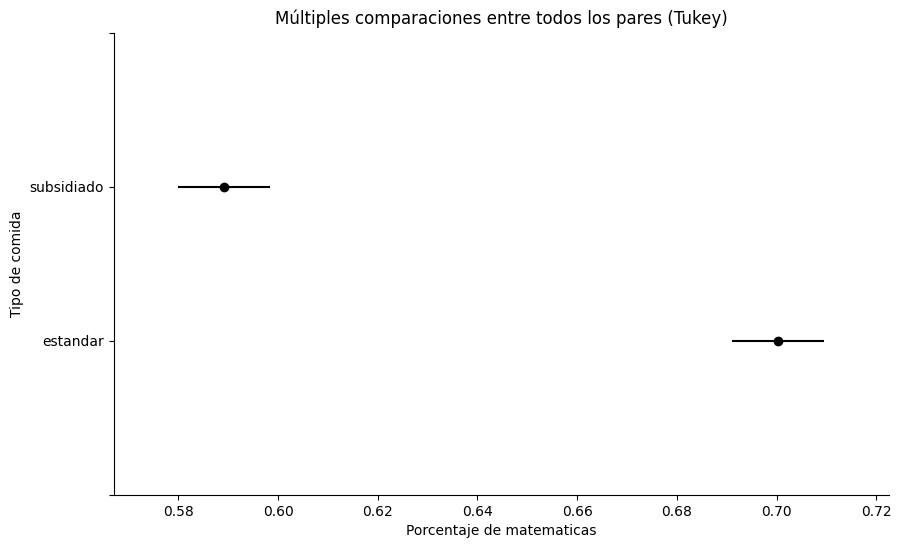

In [137]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'], #variable de respuesta
    groups=df['tipo_de_comida'], #variable categorica
    alpha=nivel_de_significancia) #nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tipo de comida", xlabel="Porcentaje de matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Muestra los intervalos o niveles de confianza en las lineas, lo cual según el gráfico el tipo de comida que
#tienen un porcentaje mayor en matematicas es el estandar.
#Itzel Gabriela Roque Delgado

In [138]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tipo_de_comida)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#Itzel Gabriela Roque Delgado

η² (tamaño de efecto): 0.117


**CONCLUSIÓN:**

El 11.7% de la variabilidad en en el porcentaje de matematicas se puede explicar por la varibilidad en el tipo de comida; en el que este valor corresponde a un efecto moderado o de magnitud mediana a grande, lo que nos indica que la variable tipo de comida influye de manera significativa en el porcentaje de matematicas, mientras que el 88.3% restante se debe a otros factores en lo que aunque el tipo de comida es un factor relevante no es el único determinante del porcentaje de matemáticas.

**CONCLUSIÓN:**

La comida estándar es la que los estudiantes pagan a precio normal sin apoyo económico, mientras que la comida subsidiada es aquella que recibe un descuento o apoyo por parte de la escuela o un programa social.
Conforme a la prueba de Tuckey esta nos muestra los intervalos o niveles de confianza en las lineas para comparar cada par de grupo. En el gráfico se observa que dentro de la variable tipo de comida el grupo que tiene un porcentaje mayor en matematicas es el tipo estandar en el que además es posible observar que si hay diferencia significativa entre estos grupos, lo que significa que los estudiantes que consumen comida estándar tienen un porcentaje de matemáticas más alto mientras que los estudiantes con comida subsidiada tienen un porcentaje más bajo, por lo que, podemos concluir que el tipo de comida está asociado con el desempeño o porcentaje en matemáticas, ya que los dos grupos muestran promedios distintos y esta diferencia es significativa.

In [139]:
df["curso_de_preparación_para_el_examen"].unique()

array(['nada', 'completado'], dtype=object)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
completado   nada  -0.0562   0.0 -0.0755 -0.0369   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

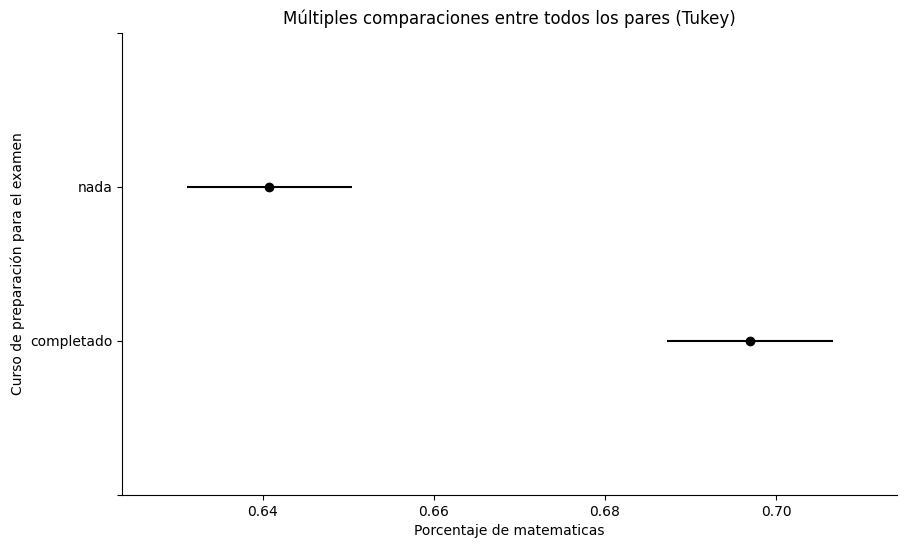

In [140]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'], #variable de respuesta
    groups=df['curso_de_preparación_para_el_examen'], #variable categorica
    alpha=nivel_de_significancia) #nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Curso de preparación para el examen", xlabel="Porcentaje de matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Muestra los intervalos o niveles de confianza en las lineas, lo cual según el gráfico el que los estudiantes tengan un curso de preparación
#completado estos presentan un porcentaje de matematicas alto.
#Itzel Gabriela Roque Delgado

In [141]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(curso_de_preparación_para_el_examen)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#Itzel Gabriela Roque Delgado

η² (tamaño de efecto): 0.030


**CONCLUSIÓN:**

La prueba de Tukey nos muestra que sí existe una diferencia significativa entre los estudiantes que completaron un curso de preparación y aquellos que no tomaron ninguno; en el que el grupo que completó el curso presenta un porcentaje de matemáticas más alto, mientras que el grupo que no realizó ningún curso obtiene un promedio más bajo. Por lo que, podemos concluir que el curso de preparación para el examen sí está relacionado con el porcentaje de matemáticas, ya que los estudiantes que lo completaron muestran un mejor desempeño o porcentaje de matematicas. Sin embargo el valor obtenido en eta cuadrado nos indica que el 3% de la variabilidad en el porcentaje de matematicas se puede puede explicar por la variabilidad en el curso de preparación lo que indica que el efecto es pequeño, lo que significa que aunque la diferencia es real su influencia en el porcentaje de matematicas es limitada y la mayor parte de la variabilidad se debe a otros factores la cual corresponde al 99.97%.

In [142]:
df["sexo"].unique()

array(['mujer', 'hombre'], dtype=object)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
hombre  mujer   -0.051   0.0 -0.0695 -0.0324   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

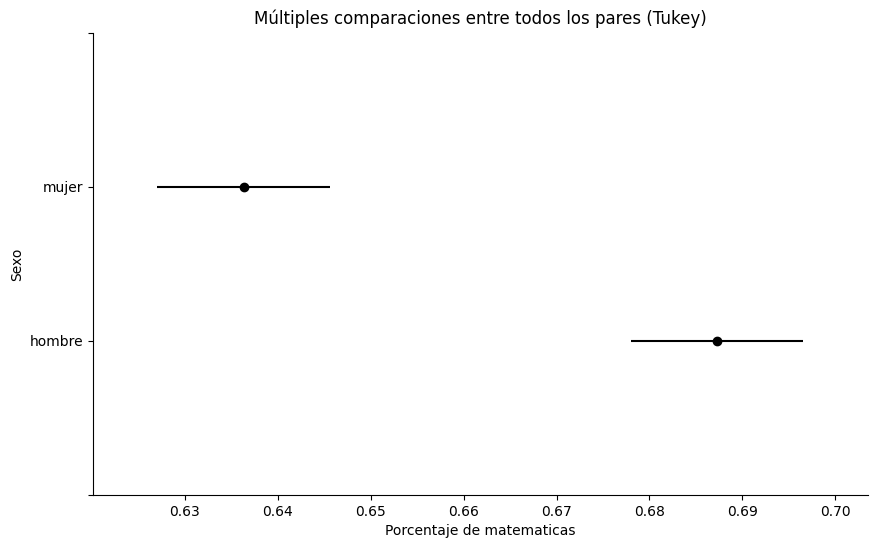

In [143]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['porcentaje_de_matematicas'], #variable de respuesta
    groups=df['sexo'], #variable categorica
    alpha=nivel_de_significancia) #nivel de significancia

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Sexo", xlabel="Porcentaje de matematicas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#Muestra los intervalos o niveles de confianza en las lineas, lo cual según el gráfico el tipo de sexo que
#tiene un pocentaje de matematicas es el hombre.
#Itzel Gabriela Roque Delgado

In [144]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(sexo)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#Itzel Gabriela Roque Delgado

η² (tamaño de efecto): 0.027


**CONCLUSIÓN:**

La prueba de Tukey nos muestra que sí existe una diferencia significativa entre hombres y mujeres en el porcentaje de matemáticas. Los hombres presentan un porcentaje más alto que las mujeres, ya que la diferencia entre ambos grupos es estadísticamente significativa. Esto indica que el sexo está relacionado con el desempeño o el porcentaje de matematicas. Sin embargo, el valor de eta cuadrado nos indica que solo el 2.7% de la variabilidad en el porcentaje de matemáticas se explica por la variabilidad del sexo, lo que representa un efecto pequeño. Por lo que, aunque la diferencia entre los grupos es real, su influencia en el desempeño o porcentaje de matematicas es limitada y la mayor parte de la variación se debe a otros factores que corresponde al 97.3%.

**CONCLUSIÓN GENERAL:**

El análisis ANOVA nos mostró que todas las variables categóricas evaluadas presentan diferencias significativas en el porcentaje de matemáticas, ya que en todos los casos el valor-p fue menor a 0.05. Las pruebas de Tukey nos permitieron identificar entre qué grupos se encuentran esas diferencias. En la variable etnia, algunos grupos mostraron porcentajes similares, pero otros se diferenciaron de manera clara destacando el grupo E con el puntaje más alto; sin embargo, su efecto es pequeño ya que representa solo el 5.5%. Para nivel educativo de los padres, la mayoría de los grupos no presentan diferencias, a excepto de casos específicos como maestría, pero el efecto es también pequeño ya que solo se obtuvo el 2.5% de la variabilidad del procentaje de matematicas en relación a esta variable. En la variable tipo de comida sí se observó una diferencia significativa notable entre comida estándar y subsidiada, con un efecto moderado del 11.7%. En curso de preparación para el examen, para los estudiantes qye completaron el curso obtuvieron mejores porcentajes, aunque el efecto es pequeño abarcando solo el 3%. Finalmente, en la variable sexo, los hombres presentan un porcentaje ligeramente mayor que las mujeres, pero esta diferencia explica muy poca variabilidad ya que esta es del 2.7%. En conjunto, aunque todas las variables categóricas muestran diferencias significativas, la mayoría tienen efectos pequeños, lo que indica que existen otros factores más importantes que explican la mayor parte del desempeño o del porcentaje obtenido en matemáticas.